# Import libraries

In [16]:
import numpy as np # linear algebra
import os
from tqdm import tqdm
from tensorflow import keras
import cv2
from sklearn.utils import shuffle
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten
from keras.models import Model
import matplotlib.pyplot as plt

# Load & preprocess data

In [2]:
directory = '/kaggle/input/vegetable-image-dataset/Vegetable Images/train'

labels = [name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name))]
labels

['Broccoli',
 'Capsicum',
 'Bottle_Gourd',
 'Radish',
 'Tomato',
 'Brinjal',
 'Pumpkin',
 'Carrot',
 'Papaya',
 'Cabbage',
 'Bitter_Gourd',
 'Cauliflower',
 'Bean',
 'Cucumber',
 'Potato']

In [3]:
print("pre-processing data\n")
image_data = []
label_data = []
image_size = 150
data_dirs = ["train","validation","test"]  # List of directories to load data from
for data_dir in data_dirs:
    for i in labels:
        data_path = os.path.join("/kaggle/input/vegetable-image-dataset/Vegetable Images/", data_dir, i)
        for m in tqdm(os.listdir(data_path)):
            image = cv2.imread(os.path.join(data_path, m))
            image = cv2.resize(image, (image_size, image_size))
            image_data.append(image)
            label_data.append(i)
image_data = np.array(image_data)
label_data = np.array(label_data)

pre-processing data



100%|██████████| 200/200 [00:01<00:00, 129.42it/s]


In [4]:
image_data,label_data=shuffle(image_data,label_data,random_state=42)
X_train,X_test,Y_train,Y_test=train_test_split(image_data,label_data,test_size=0.2,random_state=42)

In [5]:
train_label_data_new=[]
test_label_data_new=[]
for n in Y_train:
    train_label_data_new.append(labels.index(n))
Y_train=train_label_data_new
Y_train=to_categorical(Y_train)
    
for n in Y_test:
    test_label_data_new.append(labels.index(n))
Y_test=test_label_data_new
Y_test=to_categorical(Y_test)

# VGG16Model

In [6]:
vgg = VGG16(input_shape=(150,150,3), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)
prediction = Dense(15, activation='softmax')(x)
modelvgg = Model(inputs=vgg.input, outputs=prediction)
modelvgg.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 15)                  │         122,895 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,837,583 (56.60 MB)

 Trainable params: 122,895 (480.06 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [7]:
modelvgg.compile(optimizer='adam',
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=[keras.metrics.AUC(name='auc')])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=8,restore_best_weights=True)

In [8]:
history=modelvgg.fit(X_train,Y_train,
 epochs=10,batch_size= 10,
 validation_data=(X_test,Y_test), callbacks=callback)

Epoch 1/10
1680/1680 ━━━━━━━━━━━━━━━━━━━━ 70s 39ms/step - auc: 0.9523 - loss: 2.8469 - val_auc: 0.9939 - val_loss: 0.4088
Epoch 2/10
1680/1680 ━━━━━━━━━━━━━━━━━━━━ 69s 41ms/step - auc: 0.9944 - loss: 0.4319 - val_auc: 0.9946 - val_loss: 0.4702
Epoch 3/10
1680/1680 ━━━━━━━━━━━━━━━━━━━━ 69s 41ms/step - auc: 0.9964 - loss: 0.2644 - val_auc: 0.9958 - val_loss: 0.5419
Epoch 4/10
1680/1680 ━━━━━━━━━━━━━━━━━━━━ 69s 41ms/step - auc: 0.9972 - loss: 0.2556 - val_auc: 0.9925 - val_loss: 0.8346
Epoch 5/10
1680/1680 ━━━━━━━━━━━━━━━━━━━━ 69s 41ms/step - auc: 0.9983 - loss: 0.1506 - val_auc: 0.9944 - val_loss: 0.8237
Epoch 6/10
1680/1680 ━━━━━━━━━━━━━━━━━━━━ 69s 41ms/step - auc: 0.9981 - loss: 0.2945 - val_auc: 0.9949 - val_loss: 0.6388
Epoch 7/10
1680/1680 ━━━━━━━━━━━━━━━━━━━━ 69s 41ms/step - auc: 0.9987 - loss: 0.1297 - val_auc: 0.9960 - val_loss: 0.6170
Epoch 8/10
1680/1680 ━━━━━━━━━━━━━━━━━━━━ 69s 41ms/step - auc: 0.9993 - loss: 0.0808 - val_auc: 0.9958 - val_loss: 0.8597
Epoch 9/10
1680/1680 ━━━

# Accuracy & Loss

In [9]:
loss, accuracy = modelvgg.evaluate(X_train, Y_train)
print("Train Loss: ", loss)
print("Train Accuracy: ", accuracy)

525/525 ━━━━━━━━━━━━━━━━━━━━ 47s 70ms/step - auc: 0.9999 - loss: 0.0098
Train Loss:  0.0162967536598444
Train Accuracy:  0.9997767210006714


In [10]:
loss, accuracy = modelvgg.evaluate(X_test, Y_test)
print("Test Loss: ", loss)
print("Test Accuracy: ", accuracy)

132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - auc: 0.9982 - loss: 0.2302
Test Loss:  0.22441428899765015
Test Accuracy:  0.9983417391777039


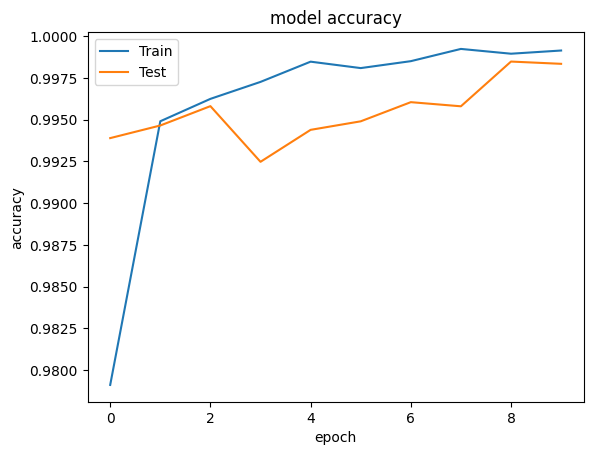

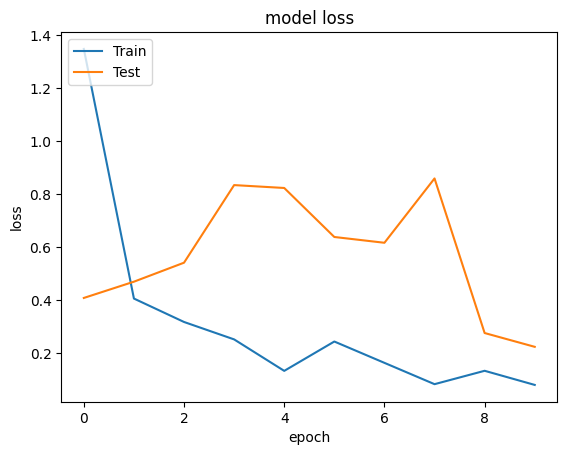

In [11]:
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Confusion matrix & Classification report

In [12]:
predictions = modelvgg.predict(X_test)
y_pred=np.argmax(predictions, axis=1)
y_test=np.argmax(Y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)
display_c_m = ConfusionMatrixDisplay(cm, display_labels=labels)

132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step
[[290   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 289   0   0   0   0   0   0   1   0   0   0   0   0   0]
 [  0   0 263   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1 271   0   1   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 291   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 265   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2 293   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 274   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0 281   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 259   0   1   0   0   0]
 [  0   0   1   0   1   0   0   0   0   0 296   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0 286   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 280   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 257   0]
 [  0   0   0   0   1   0   0   2   0   0   0   0   0   0 291]]


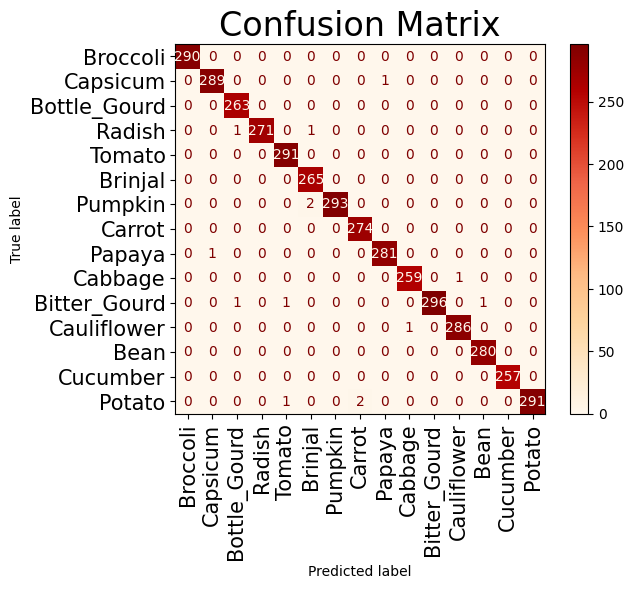

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       290
           1       1.00      1.00      1.00       290
           2       0.99      1.00      1.00       263
           3       1.00      0.99      1.00       273
           4       0.99      1.00      1.00       291
           5       0.99      1.00      0.99       265
           6       1.00      0.99      1.00       295
           7       0.99      1.00      1.00       274
           8       1.00      1.00      1.00       282
           9       1.00      1.00      1.00       260
          10       1.00      0.99      0.99       299
          11       1.00      1.00      1.00       287
          12       1.00      1.00      1.00       280
          13       1.00      1.00      1.00       257
          14       1.00      0.99      0.99       294

    accuracy                           1.00      4200
   macro avg       1.00      1.00      1.00      4200
weighted avg       1.00   

In [13]:
display_c_m.plot(cmap='OrRd', xticks_rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Confusion Matrix', fontsize=24)
plt.show()
print(classification_report(y_test, y_pred))